In [1]:
import os
import numpy as np
import rasterio as rio
from rasterio.plot import plotting_extent
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import seaborn as sns
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [4]:
with rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as lidar_dem:
    lidar_dem_im = lidar_dem.read(1, masked=True)
    # get bounds for plotting
    bounds = plotting_extent(lidar_dem)
    print(bounds)
    
with rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif') as lidar_dsm:
    lidar_dsm_im = lidar_dsm.read(1, masked=True)
    
lidar_dsm_im



(472000.0, 476000.0, 4434000.0, 4436000.0)


masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.5899658203125,
         1696.3900146484375],
        [--, --, --, ..., 1695.5999755859375, 1695.6300048828125, 1697.0],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.449951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.402823e+38,
  dtype=float32)

In [5]:
print("Is the spatial extent the same?", lidar_dem.bounds == lidar_dsm.bounds), 

## is the resolution the same ??
print("Is the resolution the same?", lidar_dem.res == lidar_dsm.res)

Is the spatial extent the same? True
Is the resolution the same? True


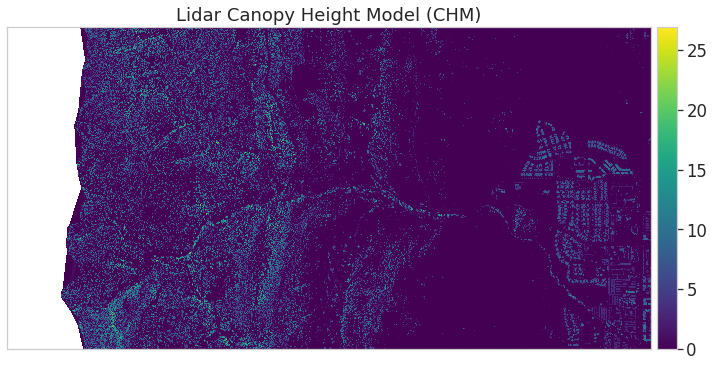

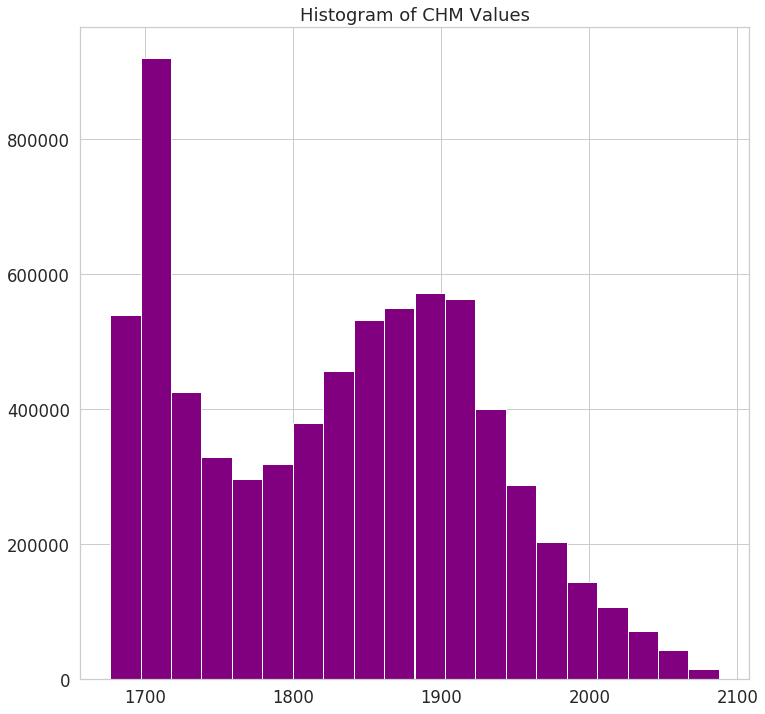

In [8]:
lidar_chm_im = lidar_dsm_im - lidar_dem_im
# plot the data
ep.plot_bands(lidar_chm_im, 
              cmap='viridis',
              title="Lidar Canopy Height Model (CHM)",
              scale=False)
plt.show()

ep.hist(lidar_dem_im[~lidar_dem_im.mask].ravel(), 
        colors = 'purple',
        title="Histogram of CHM Values")
plt.show()



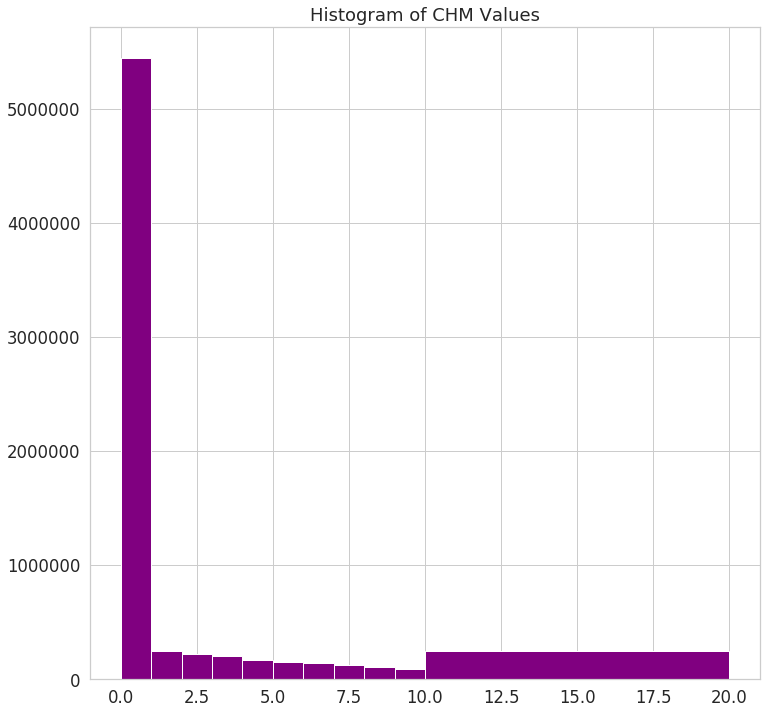

In [22]:
ep.hist(lidar_chm_im.ravel(),
        bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
        colors = 'purple',
        title="Histogram of CHM Values")
plt.show()

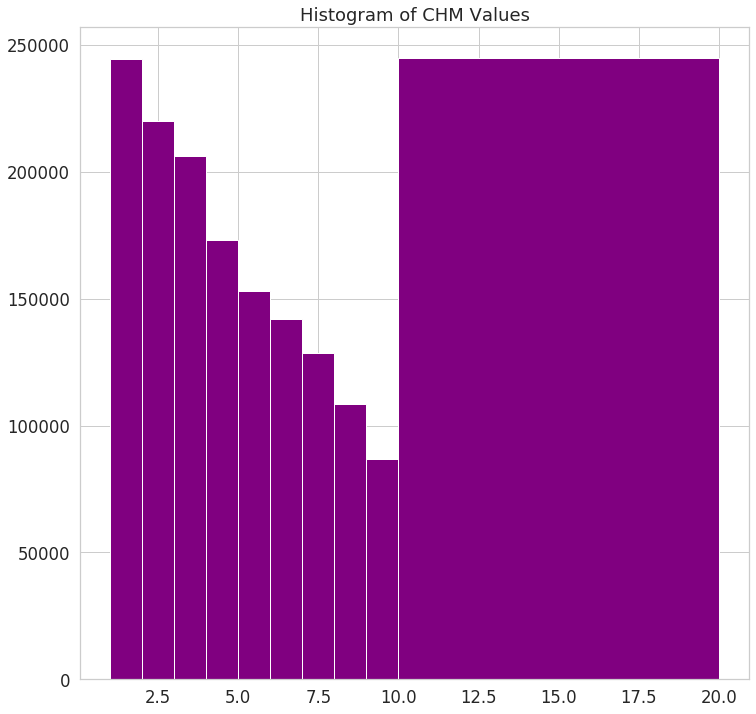

In [24]:
ep.hist(lidar_chm_im.ravel(),
        bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
        colors = 'purple',
        title="Histogram of CHM Values")
plt.show()


In [25]:
print('CHM minimum value: ', lidar_chm_im.min())
print('CHM max value: ', lidar_chm_im.max())

CHM minimum value:  0.0
CHM max value:  26.930054


In [26]:
if os.path.exists('/home/marta/PycharmProjects/Earth analytics/spatial/outputs'):
    print('The directory exists!')
else:
    os.makedirs('/home/marta/PycharmProjects/Earth analytics/spatial/outputs')


The directory exists!


In [29]:
lidar_dem.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 4000,
 'height': 2000,
 'count': 1,
 'crs': CRS.from_epsg(32613),
 'transform': Affine(1.0, 0.0, 472000.0,
        0.0, -1.0, 4436000.0)}

In [31]:
lidar_chm_im.min()
lidar_chm_im


masked_array(
  data=[[--, --, --, ..., 0.0, 0.1700439453125, 0.9600830078125],
        [--, --, --, ..., 0.0, 0.090087890625, 1.6400146484375],
        [--, --, --, ..., 0.0, 0.0, 0.0799560546875],
        ...,
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.402823e+38,
  dtype=float32)

In [33]:
# fill the masked pixels with a set no data value
nodatavalue = -999.0
lidar_chm_im_fi = np.ma.filled(lidar_chm_im, fill_value=nodatavalue)
lidar_chm_im_fi.min(), nodatavalue


(-999.0, -999.0)

In [34]:
# update the metadata to ensure the nodata value is properly documented 

# create dictionary copy
chm_meta = lidar_dem.meta.copy()
# update the nodata value to be an easier to use number
chm_meta.update({'nodata': nodatavalue})
chm_meta


{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -999.0,
 'width': 4000,
 'height': 2000,
 'count': 1,
 'crs': CRS.from_epsg(32613),
 'transform': Affine(1.0, 0.0, 472000.0,
        0.0, -1.0, 4436000.0)}

In [35]:
lidar_chm_im_fi.shape

(2000, 4000)

In [36]:
out_path = "/home/marta/PycharmProjects/Earth analytics/spatial/outputs/lidar_chm.tiff"
with rio.open(out_path, 'w', **chm_meta) as outf:
    outf.write(lidar_chm_im_fi, 1)


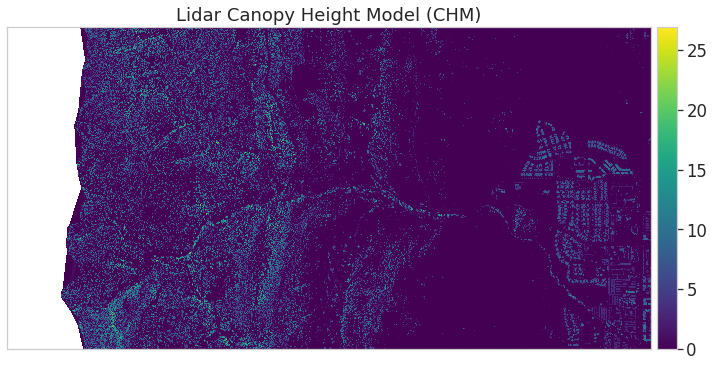

In [40]:
with rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/outputs/lidar_chm.tiff') as new_chm:
    new_chm_1 = new_chm.read(1, masked=True)
    
    ep.plot_bands(new_chm_1,
    cmap='viridis',
    title="Lidar Canopy Height Model (CHM)",
    scale=False)
    plt.show()